# 資工二 109590011 陳彥宇 資料科學導論 Lab5

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

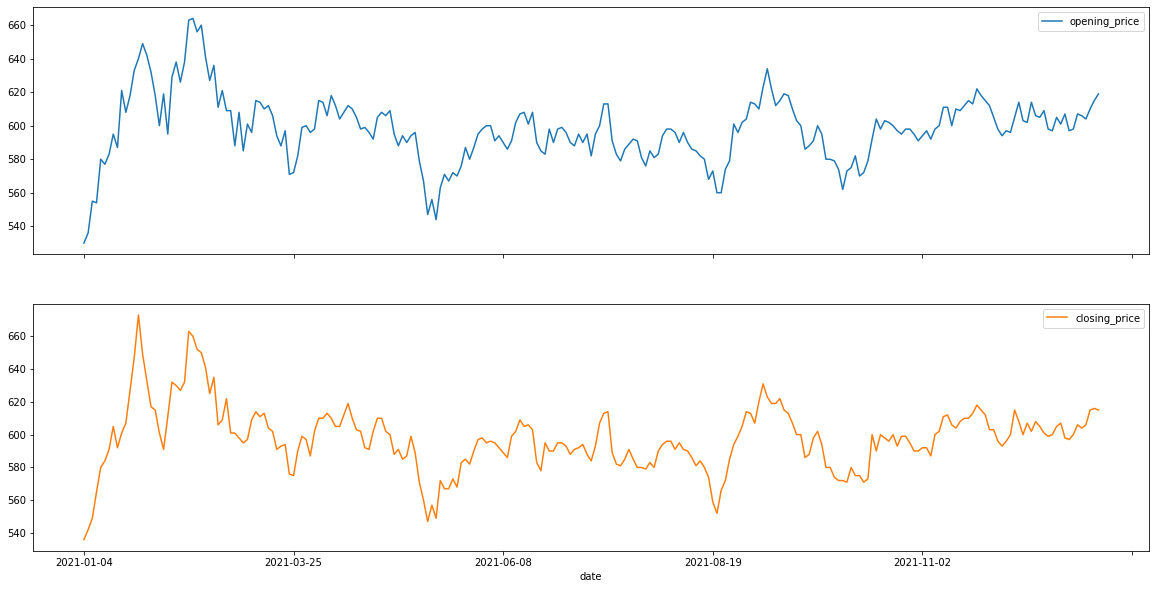

In [25]:
import requests
import pandas as pd
import time
import datetime
import pathlib

def getData():
    date = datetime.date(2021, 1, 1)
    result = None

    for i in range(365):
        dateString = str(date).replace('-', '')
        
        url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={dateString}&type=ALLBUT0999'
        response = requests.get(url)
        json = response.json()
        if json['stat'] == 'OK':
            data = pd.DataFrame(json['data9'], columns=json['fields9'])
            data['date'] = date
            data = data.rename(columns = {
                '證券名稱': 'name',
                '開盤價': 'openingPrice',
                '收盤價': 'closingPrice',
            })
            data = data[['date', 'name', 'openingPrice', 'closingPrice']]
            data = data[data['name'] == '台積電']
            data = data.drop(columns='name', axis=1)
            result = pd.concat([result, data])

        date += datetime.timedelta(days=1)
        time.sleep(5)

    return result

def saveDataAsCSV():
    data = getData()
    data.to_csv('data.csv', index=False)

filePath = f'{pathlib.Path().resolve()}/data.csv'
data = pd.read_csv(filePath)
data = data.set_index('date')
data = data.rename(columns = {
                'openingPrice': 'opening_price',
                'closingPrice': 'closing_price',
            })

data.plot(subplots=True, figsize=(20, 10))